# Analysis for the learning of the 2D dynamics with streamfunction wind and the attack angle (alpha), theta, and vthetea as states

Streamfunction shape:

$$
W_x = k \cdot rk_y \bigg (1+\epsilon \sin \big(\frac{\pi \cdot rk_x}{L_x} \big )\cos \big(\frac{\pi \cdot rk_y}{L_y} \big)\frac{\pi}{L_y} \bigg) \\
W_y = -k\cdot rk_y\frac{rk_y}{2}\epsilon \sin \big( \frac{\pi \cdot rk_y}{L_y} \big)\cos \big( \frac{\pi \cdot rk_x}{L_x} \big)
$$

with:
$$
L_x = 50\\
L_y = 50\\
k = 0.5
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 19, 20]
n_alphas = len(alphas)
n_actions = 3

fs = 15
title_fs = 17
label_fs = 13
legend_fs = 11

## 1) Q matrix

In [2]:
cQ = pd.read_csv("cQ_mat.txt")
pQ = pd.read_csv("pQ_mat.txt")

print(cQ.head(4))

thetas = cQ.theta.unique()
vthetas = cQ.vtheta.unique()

print(thetas)
print(vthetas)

   episode  alpha_idx  theta  vtheta    action_0    action_1    action_2
0        0          0    0.0   -20.0    0.000000  499.301404  500.000047
1        0          1    0.0   -20.0  500.000094  500.000000  500.000015
2        0          2    0.0   -20.0  500.000058  500.000000  500.000000
3        0          3    0.0   -20.0  500.000042  500.000000  500.000000
[0.       0.392699 0.785398 1.178097 1.570796 2.356194 3.141593]
[-20.  -10.   -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5   2.   10.
  20. ]


In [3]:
#cQ_count = pd.read_csv("cQ_count.txt", header=None, delim_whitespace=True)
#pQ_count = pd.read_csv("pQ_count.txt", header=None, delim_whitespace=True)

#cQ_count.head(4)

In [4]:
# check
if (pQ['episode'].max() != cQ['episode'].max() ):
    print("ERROR! maximum number of episodes is not the same")
    
ep_max = pQ['episode'].max()
print(ep_max)
# controllo se gli elementi per alpha = 20 all'ultimo episodio sono uguali (non dovrebbero esserlo)
#(cQ.loc[((cQ['episode'] == ep_max) & (cQ['alpha_idx'] == 15))] == pQ.loc[((pQ['episode'] == ep_max) & (pQ['alpha_idx'] == 15))]).all()

9980


In [5]:
theta_selected = thetas[0]
vtheta_selected = vthetas[0]
alph = 13

print(cQ.loc[((cQ['episode'] == ep_max) &\
         (cQ['theta'] == theta_selected) & \
         (cQ['vtheta'] == vtheta_selected) & \
         (cQ['alpha_idx'] == alph))])
print(pQ.loc[((pQ['episode'] == ep_max) &\
         (pQ['theta'] == theta_selected) & \
         (pQ['vtheta'] == vtheta_selected) & \
         (pQ['alpha_idx'] == alph))])

        episode  alpha_idx  theta  vtheta  action_0    action_1    action_2
726557     9980         13    0.0   -20.0  444.7647  444.570295  444.542659
        episode  alpha_idx  theta  vtheta    action_0    action_1    action_2
726557     9980         13    0.0   -20.0  303.604457  258.231796  243.062547


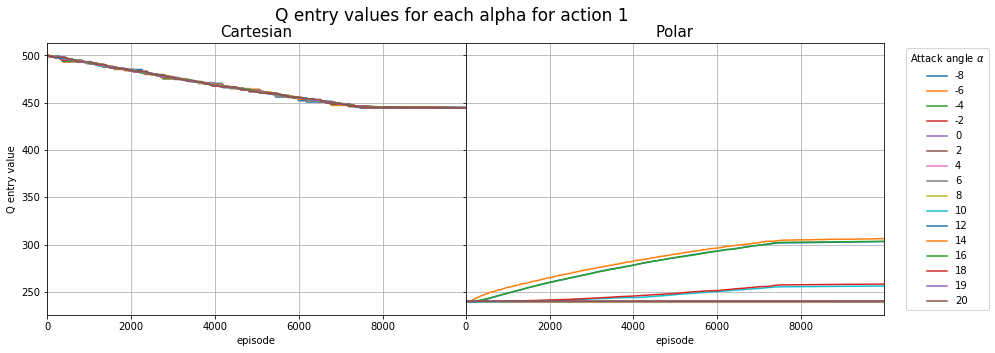

In [6]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

chosen_action = 1

for alph, val in enumerate(alphas):
    
    fig.suptitle("Q entry values for each alpha for action " + str(chosen_action), fontsize = title_fs)
         
    #df = cQ.loc[cQ['alpha_idx'] == alph]
    df = cQ.loc[((cQ['theta'] == theta_selected) & \
                 (cQ['vtheta'] == vtheta_selected) & \
                 (cQ['alpha_idx'] == alph))]
    #print(df.head(5))
    #df = df.loc[((df['theta'] == theta_selected) & (df['vtheta'] == vtheta_selected))]
    axs[0].plot(df['episode'], df['action_'+str(chosen_action)], label = str(alphas[alph]))
    plt.grid(b=True)

    
    #df = pQ.loc[pQ['alpha_idx'] == alph]
    df1 = pQ.loc[((pQ['theta'] == theta_selected) & \
                 (pQ['vtheta'] == vtheta_selected) & \
                 (pQ['alpha_idx'] == alph))]
    #df = df.loc[((df['theta'] == theta_selected) & (df['vtheta'] == vtheta_selected))]
    axs[1].plot(df1['episode'], df1['action_'+str(chosen_action)],  label = str(alphas[alph]))
    axs[0].grid(b=True)

    plt.legend(title = 'Attack angle ' + r'$\alpha$', bbox_to_anchor=(1.04,1), loc="upper left")
    
    axs[0].set_ylabel('Q entry value')
    axs[0].set_xlim(0,ep_max)

    axs[0].set_title("Cartesian", fontsize = fs)
    axs[1].set_title("Polar", fontsize = fs)
    
for ax in axs.flat:
    ax.set(xlabel='episode')
    

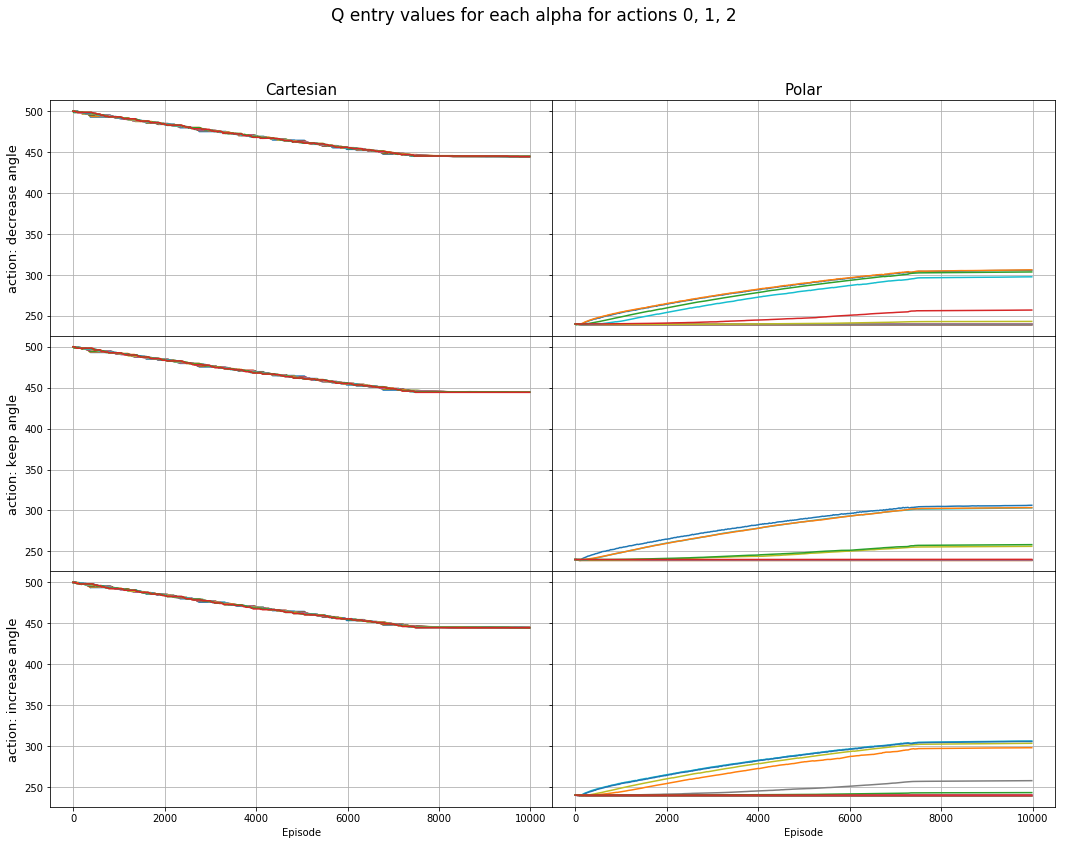

In [7]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(18, 13), gridspec_kw={'wspace': 0, 'hspace':0})
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs
ep_max = cQ['episode'].max()

theta_selected = thetas[0]
vtheta_selected = vthetas[0]

actions = ['action_0', 'action_1', 'action_2']

fig.suptitle("Q entry values for each alpha for actions 0, 1, 2 ", fontsize = title_fs)

for alph in range(1,15):
    
    #df = cQ.loc[cQ['alpha_idx'] == alph]
    
    df = cQ.loc[((cQ['theta'] == theta_selected) & \
                 (cQ['vtheta'] == vtheta_selected) & \
                 (cQ['alpha_idx'] == alph))]

    ax1.plot(df['episode'], df['action_0'], label = str(alphas[alph]))
    ax3.plot(df['episode'], df['action_1'], label = str(alphas[alph]))
    ax5.plot(df['episode'], df['action_2'], label = str(alphas[alph]))
    
    ax1.set_ylabel('action: decrease angle', fontsize = label_fs)
    ax3.set_ylabel('action: keep angle', fontsize = label_fs)
    ax5.set_ylabel('action: increase angle', fontsize = label_fs)

    #df = pQ.loc[pQ['alpha_idx'] == alph]
    
    df1 = pQ.loc[((pQ['theta'] == theta_selected) & \
                 (pQ['vtheta'] == vtheta_selected) & \
                 (pQ['alpha_idx'] == alph))]
    
    ax2.plot(df1['episode'], df1['action_0'], label = str(alphas[alph]))
    ax4.plot(df1['episode'], df1['action_1'], label = str(alphas[alph]))
    ax6.plot(df1['episode'], df1['action_2'], label = str(alphas[alph]))

ax1.set_title("Cartesian", fontsize = fs)
ax2.set_title("Polar", fontsize = fs)
    
for ax in axs.flat:
    ax.set(xlabel='Episode')
    
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

## 2) Rewards

In [8]:
crew = pd.read_csv("crewards.txt")
prew = pd.read_csv("prewards.txt")

crew.head(3)

,episode,epsilon,Alpha,steps,return
0,0,0.9,0.001,198020,1.825644
1,1,0.9,0.001,817497,0.986377
2,2,0.9,0.001,226857,1.308397


In [9]:
# check if the learning phases were identical
c_eplength = crew['steps'].max()
p_eplength = crew['steps'].max()

if ((crew['Alpha'].astype(float) == prew['Alpha'].astype(float)).all() == False \
    or (crew['epsilon'].astype(float) == prew['epsilon'].astype(float)).all() == False \
    or c_eplength != p_eplength):
    print("ERROR!!!")

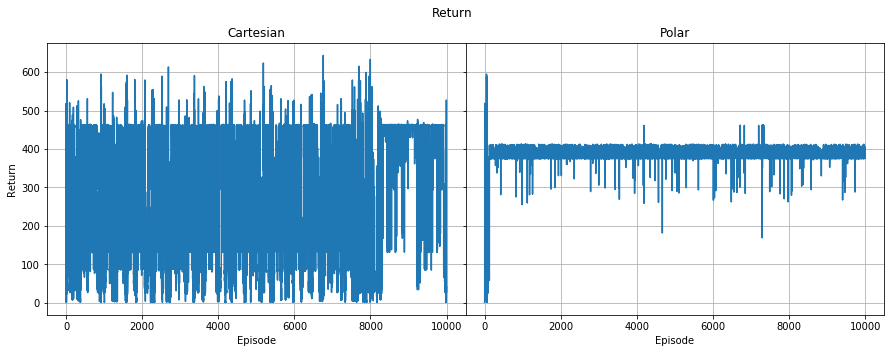

In [10]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle("Return")

axs[0].plot(crew['episode'], crew['return'])
plt.grid(b=True)

axs[1].plot(prew['episode'], prew['return'])
axs[0].grid(b=True)

#axs[0].legend(title = , fontsize = legend_fs, loc='upper left', prop={"size":9})
axs[0].set_ylabel('Return')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Episode')

## Mean growth of returns

In [11]:
num_blocks = 20
data_per_block = int(len(crew)/num_blocks)

cmean = []
pmean = []
for i in range(0,num_blocks):
    #print(i*n_data,i*n_data+n_data)
    cmean.append(np.mean(crew['return'][i*data_per_block:i*data_per_block+data_per_block]))
    pmean.append(np.mean(prew['return'][i*data_per_block:i*data_per_block+data_per_block]))

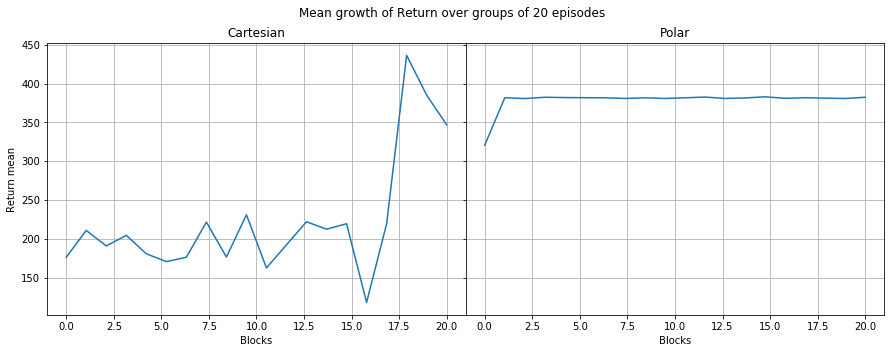

In [12]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Mean growth of Return over groups of ' + str(num_blocks) + ' episodes')

axs[0].plot(np.linspace(0, num_blocks, num_blocks), cmean)
plt.grid(b=True)

axs[1].plot(np.linspace(0, num_blocks, num_blocks), pmean)
axs[0].grid(b=True)

axs[0].set_ylabel('Return mean')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')

## 3) Last iteration Policy

In [15]:
cpol = pd.read_csv("cpolicy.txt")
ppol = pd.read_csv("ppolicy.txt")

cpol.head(3)

,step,alpha,action,reward,Q[s+0],Q[s+1],Q[s+2]
0,0,12.0,0,0.000000,444.638382,444.585008,444.544248
1,1000,10.0,0,0.006912,444.785693,444.756140,444.776566
2,2000,8.0,0,0.012998,444.723228,444.706873,444.690071


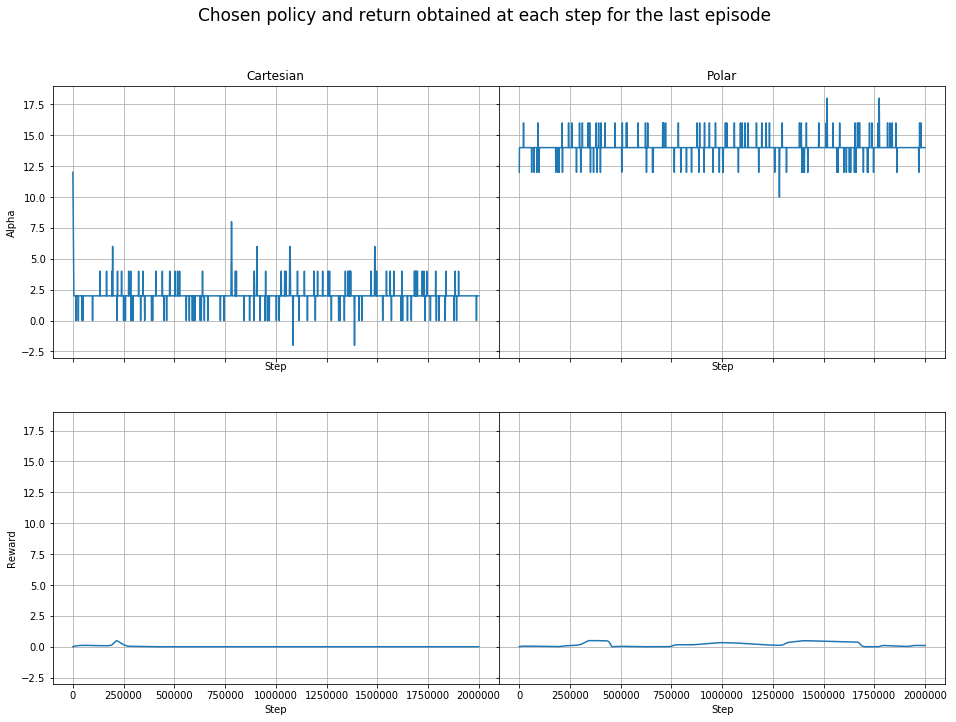

In [16]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 11), gridspec_kw={'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs

fig.suptitle("Chosen policy and return obtained at each step for the last episode", fontsize = title_fs)

ax1.plot(cpol['step'], cpol['alpha'])
ax2.plot(ppol['step'], ppol['alpha'])

ax3.plot(cpol['step'], cpol['reward'])
ax4.plot(ppol['step'], ppol['reward'])

ax1.set_ylabel('Alpha')
ax3.set_ylabel('Reward')

ax1.set_title("Cartesian")
ax2.set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Step')
    
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

## 4) last episode dynamics plot

In [18]:
cout = pd.read_csv("cout.txt")
pout = pd.read_csv("pout.txt")

pout.head(3)

,t,x_kite,z_kite,x_block,z_block,theta,vtheta,windx,windy,v_block,Tension
0,0,50.000000,0.000500,0.000000,0.0,0.000010,0.999921,0.000250,0.000000,0.003142,31811.240909
1,1000,50.001209,0.476539,0.003480,0.0,0.009531,0.907075,0.238269,0.000170,0.671165,28999.173781
2,2000,50.004689,0.909911,0.012969,0.0,0.018199,0.828817,0.454955,0.001183,1.206843,-23591.842006


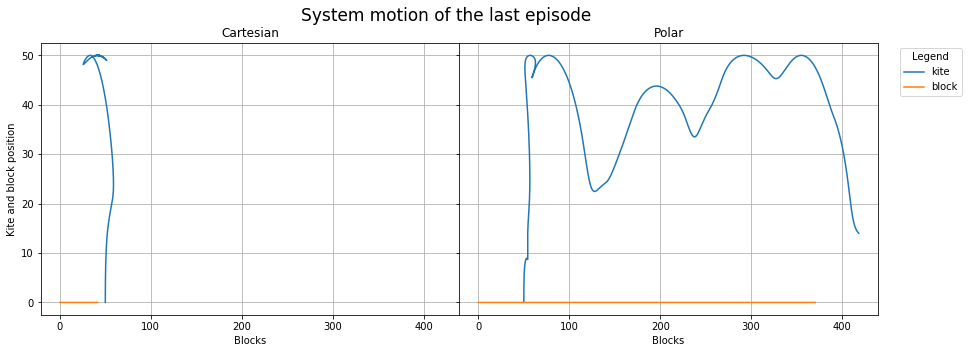

In [27]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('System motion of the last episode', fontsize = title_fs)

axs[0].plot(cout['x_kite'], cout['z_kite'],label='kite')
axs[0].plot(cout['x_block'], cout['z_block'],label='block')
axs[0].grid(b=True)

axs[1].plot(pout['x_kite'], pout['z_kite'],label='kite')
axs[1].plot(pout['x_block'], pout['z_block'],label='block')
axs[1].grid(b=True)

plt.legend(title = 'Legend', bbox_to_anchor=(1.04,1), loc="upper left")
        
axs[0].set_ylabel('Kite and block position')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')
    
plt.savefig("prova.png")

## 5) Q matrix counter

In [25]:
#cQ_count = pd.read_csv("cQ_counter_streamfunction.txt")
#pQ_count = pd.read_csv("pQ_counter_streamfunction.txt")
#
#pQ_count.head(5)

In [ ]:
df1 = cQ_count[['action_0','action_1', 'action_2']]
df2 = pQ_count[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())
print(vmax)

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[7,7,0.2]),figsize=(14, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="d", cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df2, annot=True, fmt="d", yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)
axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)
axs[1].set_xlabel("Action",fontsize=17)
axs[0].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()